In [1]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.request import urlopen
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


<div class="alert alert-block alert-info">
 <h3>Scraping text from a web page url.</h3>
</div>

In [12]:
def get_text_webpage_urllib(url):
    try: 
        page = urlopen(url)
        html3 = page.read().decode("utf-8")
        # pattern = "<body.*?\s>(.*?)</body>"
        # body = re.findall(pattern, html3, re.DOTALL)
        # Extracting headings and paragraphs
        pattern = "<h[1-6]|p>(.*?)</h[1-6]|p>"
        matches = re.findall(pattern, html3, re.DOTALL)
        return "".join(matches)
    # Catching the exception generated	 
    except Exception as e : 
    	print(str(e))

In [13]:
def get_text_webpage_bs(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    text = soup.get_text()
    return text

In [14]:
# How to Train Your Dragon - Wikipedia
url1 = "https://en.wikipedia.org/wiki/How_to_Train_Your_Dragon"
# Shakespeare's Plays
url2 = "https://www.shakespeare-online.com/plays/"

In [15]:
get_text_webpage_urllib(url1)[:1000], get_text_webpage_bs(url1)[:1000]

('\n<style data-mw-deduplicate="TemplateStyles:r1066479718">.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}.mw-parser-output .infobox .navbar{font-size:100%}body.skin-minerva .mw-parser-output .infobox-header,body.skin-minerva .mw-parser-output .infobox-subheader,body.skin-minerva .mw-parser-output .infobox-above,body.skin-minerva .mw-parser-output .infobox-title,body.skin-minerva .mw-parser-output .infobox-image,body.skin-minerva .mw-parser-output .infobox-full-data,body.skin-minerva .mw-parser-output .infobox-below{text-align:center}</style><table class="infobox vevent"><tbody><tr><th colspan="2" class="infobox-above summary" style="font-style: italic; background: lavender;">How to Train Your Dragon</th></tr><tr><td colspan="2" class="infobox-image"><span class="mw-default-size" typeof="mw:File/Frameless"><a href="/wiki/Fi

In [16]:
get_text_webpage_urllib(url2)[:1000], get_text_webpage_bs(url2)[:1000]

('',
 "\n\nShakespeare's Plays\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndirectory\n\n\n\n\n\n\nhome\ncontact\n\n\n\n\n\n\n\n\n\n\nwelcome\nplays\nsonnets\nanalysis\nquotations\nsources\nbiography\ntheatres\nkey dates\nplots\nfaq\nbooks\nglossary\nscholars\nquiz\n\n\n\n\nsearch\n\n\n\n\n\n\n\n\n\n\n\xa0\n\n\n\n\n\n\nShakespeare's Plays\r\nBefore the publication of the First Folio in 1623, nineteen of the thirty-seven plays in Shakespeare's canon had appeared in quarto format. With the exception of Othello (1622), all of the quartos were published prior to the date of Shakespeare's retirement from the theatre in about 1611. It is unlikely that Shakespeare was involved directly with the printing of any of his plays, although it should be noted that two of his poems, Venus and Adonis and The Rape of Lucrece were almost certainly printed under his direct supervision. \r\n\r\nHere you will find the complete text of Shakespeare's plays, based primarily on the First Folio, and 

In [17]:
web1, web2 = get_text_webpage_bs(url1), get_text_webpage_bs(url2)

<div class="alert alert-block alert-info">
 <h3><u>Preprocessing:</u></h3>
    <ul>
        <li>Cleaning.</li>        
        <li>Remove stopping words.</li>
        <li>Normalization.</li>
        <li>Tokenization.</li>
        <li>Lemmatization.</li>
        <li>Stemming.</li>
    </ul>
</div>

In [18]:
# Punctuations to be cleaned from our text
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# English stop words with nltk
stop_words = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer(language='english')


In [86]:
def preprocess(
    text : str, 
    stemmer_name : str = None
    ) -> list:
    #remove punctuations / cleaning
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # # remove numbers
    # pattern = r"\d"
    # text = re.sub(pattern,'', text)
    # tokenization
    # words = nltk.word_tokenize(" ".join(text))
    # lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in text]

        #remove English stopping words & Normalization
    text = ' '.join(word.lower() for word in lemmas if word not in stop_words)
    # #stemming
    # match stemmer_name:
    #     case "porter":
    #         stemmer = porter_stemmer
    #     case "lancaster":
    #         stemmer = lancaster_stemmer
    #     case "snowball":
    #         stemmer = snowball_stemmer
    #     case default:
    #         stemmer = porter_stemmer
    # stems = [stemmer.stem(lemma) for lemma in lemmas]
    return text

In [87]:
processed_web1, processed_web2 = preprocess(web1), preprocess(web2)
" ".join(processed_web1)[2000:3000], " ".join(processed_web2)[2000:3000]

('        t   r   n       y   u   r       d   r   g   n       2   0   1   0   \n   \n   \n   \n   \n   \n   \n   \n   1   1   2   h   w           t   r   n       y   u   r       d   r   g   n       2       2   0   1   4   \n   \n   \n   \n   \n   \n   \n   \n   1   1   3   h   w           t   r   n       y   u   r       d   r   g   n       t   h   e       h   e   n       w   r   l       2   0   1   9   \n   \n   \n   \n   \n   \n   \n   \n   \n   \n   1   2   l   v   e   c   n       r   e   b   \n   \n   \n   \n   \n   \n   \n   \n   \n   \n   2   t   e   l   e   v   n       e   r   e   \n   \n   \n   \n   t   g   g   l   e       t   e   l   e   v   n       e   r   e       u   b   e   c   n   \n   \n   \n   \n   \n   \n   2   1   d   r   e   w   r   k       d   r   g   n       2   0   1   2   2   0   1   8   \n   \n   \n   \n   \n   \n   \n   \n   2   2   d   r   e   w   r   k       d   r   g   n       r   e   c   u   e       r   e   r       2   0   1   9   2   0   2   2   \n   \n   \n

<div class="alert alert-block alert-info">
 <h3>Getting unique words.</h3>
</div>

In [70]:
def get_unique_words(
    words:list
    ) -> list:
    return [*set(words)]

In [71]:
web1_unique_w, web2_unique_w = get_unique_words(processed_web1), get_unique_words(processed_web2)

In [72]:
print(f"Website #1 has number of {len(processed_web1)} words, while it's unique words are {len(web1_unique_w)} words")
print(f"Website #2 has number of {len(processed_web2)} words, while it's unique words are {len(web2_unique_w)} words")

Website #1 has number of 6380 words, while it's unique words are 1830 words
Website #2 has number of 1629 words, while it's unique words are 782 words


In [73]:
pattern = r"\w{3,}\s"
# [re.findall(pattern, " ".join(web2_unique_w))]
# [word  for word in web2_unique_w if len(word)>3]

<div class="alert alert-block alert-info">
 <h3>Comparing different stemmers performance.</h3>
</div>

In [74]:
stemmers = ["porter", "lancaster", "snowball"]
processed_text = list()
for stemmer in stemmers:
    processed_text.append(preprocess(web1, stemmer))

processed_text_lens = list(map(len, processed_text))
unique_words = list(map(get_unique_words, processed_text))
unique_w_lens = list(map(len, unique_words))

In [75]:
processed_text_lens, unique_w_lens

([6380, 6380, 6380], [1830, 1830, 1830])

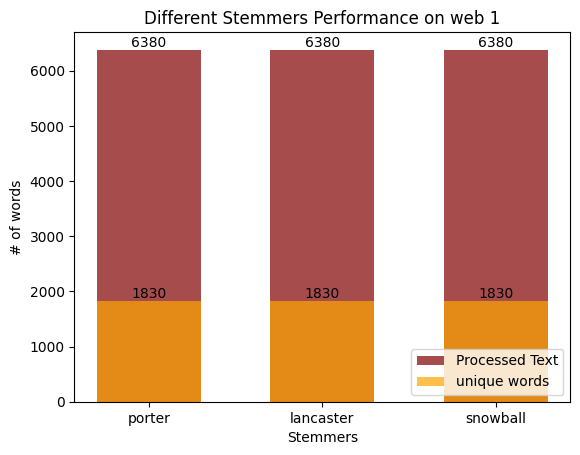

In [76]:
fig, ax = plt.subplots()
bars = ax.bar(stemmers, processed_text_lens, color ='maroon', width = 0.6, alpha=0.7, label = "Processed Text")
ax.bar_label(bars)
bars = ax.bar(stemmers, unique_w_lens, color ='orange', width = 0.6, alpha=0.7, label = "unique words")
ax.bar_label(bars)

plt.xlabel("Stemmers")
plt.ylabel("# of words")
plt.title("Different Stemmers Performance on web 1")
plt.legend(loc='lower right')
plt.show()


In [77]:
processed_text = list()
for stemmer in stemmers:
    processed_text.append(preprocess(web2, stemmer))

processed_text_lens = list(map(len, processed_text))
unique_words = list(map(get_unique_words, processed_text))
unique_w_lens = list(map(len, unique_words))

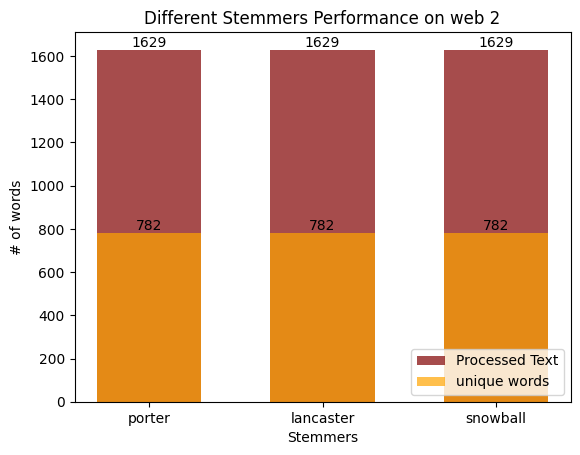

In [78]:
fig, ax = plt.subplots()
bars = ax.bar(stemmers, processed_text_lens, color ='maroon', width = 0.6, alpha=0.7, label = "Processed Text")
ax.bar_label(bars)
bars = ax.bar(stemmers, unique_w_lens, color ='orange', width = 0.6, alpha=0.7, label = "unique words")
ax.bar_label(bars)

plt.xlabel("Stemmers")
plt.ylabel("# of words")
plt.title("Different Stemmers Performance on web 2")
plt.legend(loc='lower right')
plt.show()

In [80]:
# web1_unique_w
pattern = r"\w{,2}\s"
# [re.findall(pattern, " ".join(web2_unique_w))]
[word  for word in web2_unique_w if len(word)<3]

['vi',
 'is',
 '1',
 'it',
 '2',
 '13',
 'we',
 'q',
 'iv',
 'dr',
 'no',
 're',
 'in',
 'so',
 'v',
 '5',
 '12',
 'ii',
 'i',
 'he',
 '10',
 '11',
 'mr',
 'if',
 'a',
 'z']